# GC Log Processing
#### Ellis Brown, 2021

### Specify a log file in the cell for "Path" below, then run all cells to run analysis on the gc log processing.

In [36]:
# Overhead : For development only.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Choose a file to parse. Tests selected for easy reusability

In [37]:
############### TEST SETS ##############################
from scripts import parse_log as pl
# Create gc log file by running with the following flags:
# ""-Xlog:gc*,gc+phases=debug:file=FILENAME.log"

test = "e"

if test == "a": 
    # Set the path to the file we would like to analyze
    pl.setLogPath("datasets/gc.log")
    pl.setLogSchema(1)
elif test == "b": 
    pl.setLogPath("datasets/amzn_workload_4.log")
    pl.setLogSchema(0)
elif test == "c":  
    pl.setLogPath("datasets/FLIGHT_GC.log")
    pl.setLogSchema(0)
elif test == "d":
    pl.setLogPath("datasets/long_amzn_workload.log")
    pl.setLogSchema(0)
elif test == "incomplete_test_concurrent_pauses":
    pl.setLogPath("datasets/long_a.log")
    pl.setLogSchema(0)
elif test == "linux":
    #pl.setLogPath("datasets/linux_ubuntu.log")
    pl.setLogPath("datasets/run_out.log")
    pl.setLogSchema(0)
elif test == "e":
    pl.setLogPath("datasets/gc-many/gclog-g1.1")
    pl.setLogSchema(0)
elif test == "f":
    pl.setLogPath("datasets/gc-many/gclog-shenandoah")
else:
    print("UNKNOWN TEST CASE")

### Begin processing log information. Plots data and trends



Total pauses: 331

Max wait: 1207.335 ms

Total wait: 10744.149 ms

Average (mean) wait: 32.4597 ms

Total time: 398.782

Total program runtime: 398.782 seconds

Throughput: 97.3058%

---------------------------
Pause time in ms
---------------------------
50 th percentile:  1.113
75 th percentile:  5.5475
90 th percentile:  108.617
95 th percentile:  168.843
99 th percentile:  199.0784
99.9  percentile:  932.0995
99.99 percentile:  1179.8114


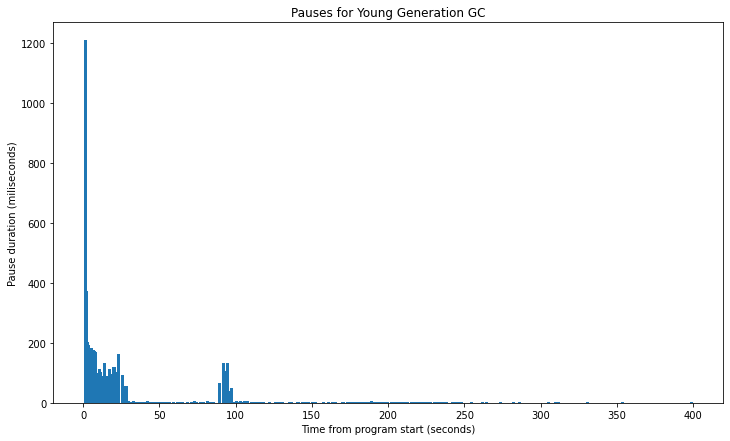

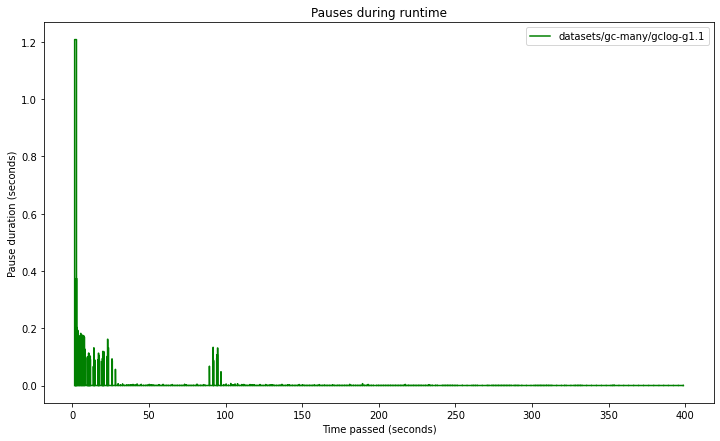

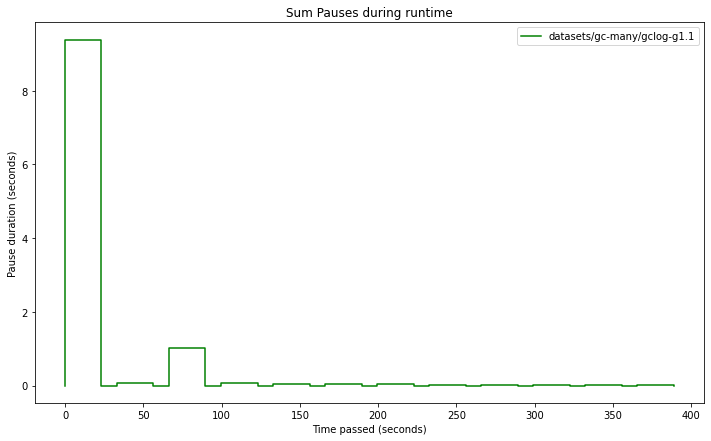

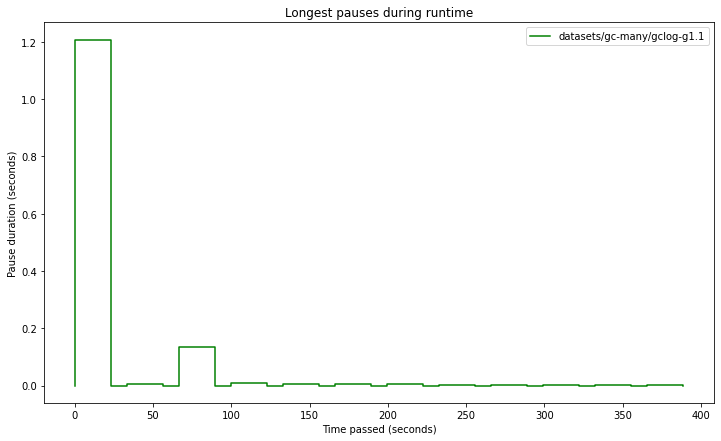

In [38]:
''' Collects information on pauses, and displays charts and metadata on pauses'''

from scripts import parse_log as pl
from scripts import plot_data as dplt
from scripts import compare_logs as cl

# Get the pauses information from file specified above
table_young_pauses = pl.getPauses(create_csv = False)

if len(table_young_pauses) > 0:
    # plot bar graph for pauses , X = time, Y = pause_duration
    dplt.plot_pauses(table_young_pauses)
    
    # plot line graph for pauses, X = time, Y = time paused (Scaled)
    # NOTE: (TODO:) these files currently live in scripts/compare_logs , they should live in plot_data
    cl.setFiles([pl.getLogPath()], [str(pl.getLogPath())])
    cl.comparePauses(True, 12, 12)
    
else:
    print("No information recorded")

In [39]:
''' Analyze heap allocation througout the program '''
from scripts import parse_log as pl
from scripts import plot_data as dplt

#################################################
# IMPORTANT NOTE: THE CURRENT X AXIS IS NOT TIME!! (fix later)
#################################################
# remove the following 2 lines after testing.


heap_allocation_sections = pl.getHeapAllocation(create_csv = False)



if heap_allocation_sections:
    data_present = False
    if len(heap_allocation_sections) == 2:
        data = heap_allocation_sections[0]
        for key in data.keys():
            if data[key]:
                data_present = True
                break
        if data_present:
            print(heap_allocation_sections)
            print("Heap allocation breakdown")
            print(len(heap_allocation_sections))
            # plot the data for pauses, printing to output the trends.
            dplt.plot_heap_allocation_breakdown(heap_allocation_sections, 3500)
            dplt.heap_allocation_beforeafter_gc(heap_allocation_sections, 3500)
        else:
            print("No heap allocation sections data collected (c)")
    else:
        print("No heap allocation sections data collected (b)")
else:
    print("No heap allocation sections data collected (a)")

#TODO: Fix formatting of table & color choices


No heap allocation sections data collected (c)


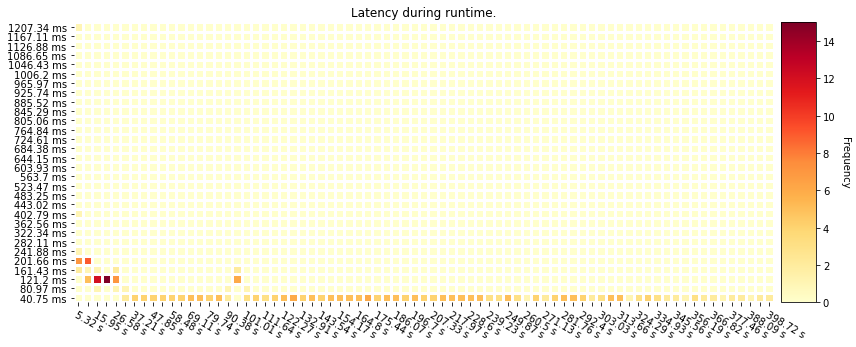

In [40]:
''' Plot a heatmap for the log file'''
from scripts import plot_data as dplt
from scripts import parse_log as pl



yp = pl.getPauses()
if not yp.empty:
    dplt.plot_heatmap(yp, 75, 30, False)         # includes frequency cells
    #dplt.plot_heatmap(yp, 20, 20, False) # does not include frequency cells
else:
    print("Unable to create heatmap: no pause information collected")

In [41]:
# Get all metadata about the specific gc used
gc_metadata = pl.getGCMetadata(create_csv = False)

if gc_metadata:
    # Create graphical table from metadata
    dplt.displayMetadata(gc_metadata)
else:
    print("Metadata not collected in GC logs")

Metadata not collected in GC logs
